# DS Clustering / K-Means

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('/home/gmelao/Desktop/default-of-credit-card-clients.csv')
df.columns = df.iloc[0]
df.drop(0, inplace = True)
df.set_index('ID', inplace = True)
pd.set_option('display.max_columns', 24)
pd.set_option('display.max_rows', 24)

In [18]:
df = df.apply(lambda df: pd.Series(map(float, df)))

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [33]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'Cluster'],
      dtype='object', name=0)

In [20]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [21]:
model = KMeans(n_clusters=5)
cluster_label = model.fit_predict(scaled_df)

/home/gmelao/mambaforge/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
cluster_label

array([1, 1, 1, ..., 3, 1, 1], dtype=int32)

In [23]:
df['Cluster'] = cluster_label

<AxesSubplot: xlabel='0'>

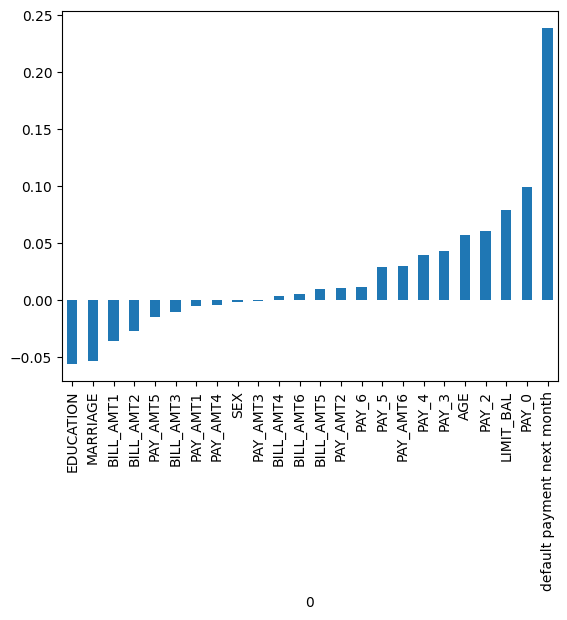

In [24]:
df.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

<AxesSubplot: xlabel='0'>

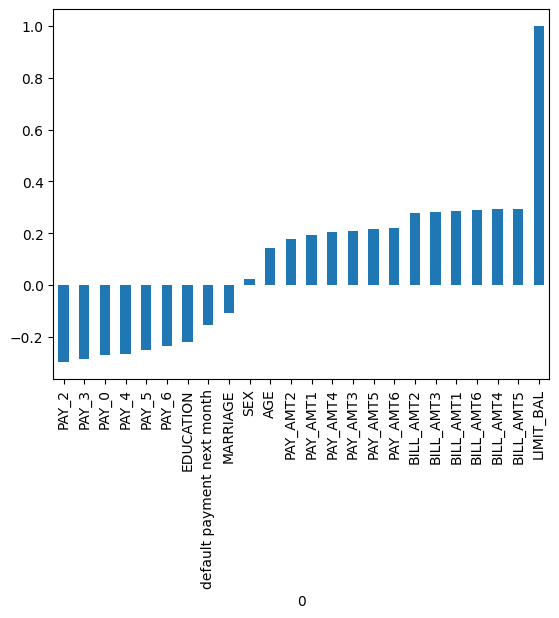

In [25]:
df.corr()['LIMIT_BAL'].iloc[:-1].sort_values().plot(kind='bar')

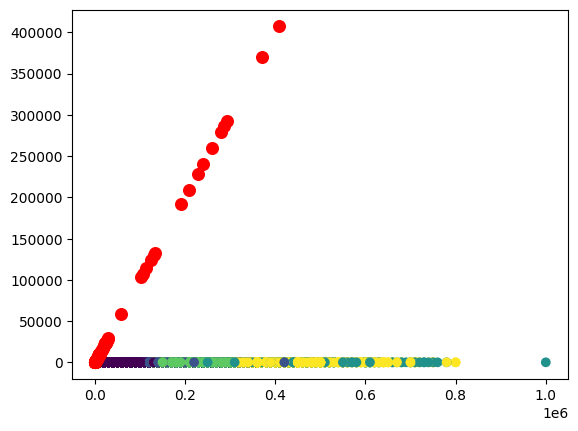

In [11]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, max_iter = 100)
pred_y = kmeans.fit_predict(df)
plt.scatter(df['LIMIT_BAL'], df['Cluster'], c = pred_y)
plt.scatter(kmeans.cluster_centers_,kmeans.cluster_centers_, s = 70, c = 'red')
plt.show()

In [30]:
def display_models(model, data, X, Y):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data, x=X, y=Y, hue=labels)

In [31]:
model = KMeans(n_clusters=4)

/home/gmelao/mambaforge/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


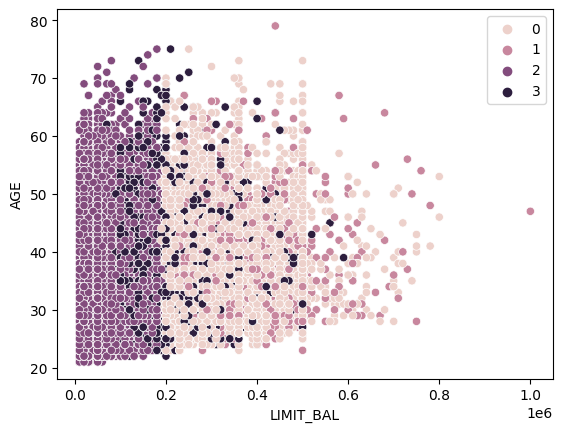

In [32]:
display_models(model, df, 'LIMIT_BAL', 'AGE')

/home/gmelao/mambaforge/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


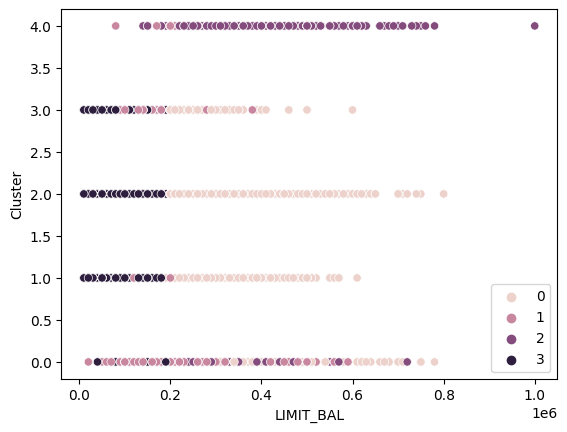

In [34]:
display_models(model, df, 'LIMIT_BAL', 'Cluster')

In [35]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Cluster
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0,1
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0,1
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0,1
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0,1
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0,0
29996,150000.0,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0,1
29997,30000.0,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0,3
29998,80000.0,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,-1645.0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0,1
